# Import module

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[fm.FontProperties(fname=font).get_name() for font in font_list]

['Nanum Pen Script',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumGothic Eco',
 'NanumGothicCoding',
 'NanumGothic Eco',
 'NanumSquare',
 'NanumSquareRound',
 'NanumSquare',
 'NanumSquare',
 'NanumSquareRound',
 'Nanum Brush Script',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumMyeongjo Eco',
 'NanumBarunpen',
 'NanumGothic',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumBarunpen',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumGothic Eco',
 'NanumSquareRound',
 'NanumGothic',
 'NanumGothic',
 'NanumMyeongjo Eco',
 'NanumMyeongjo Eco',
 'NanumSquare']

In [2]:
from pyproj import Transformer
import pyproj
from shapely.geometry import Point as point
import geopandas as gpd
import folium

In [3]:
plt.rcParams["font.family"] = 'NanumGothic'

In [4]:
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

['/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/nan

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  #font 경로 설정
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [ ]:
# mpl.rcParams['axes.unicode_minus'] = False

In [6]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.5.3
설치 위치:  /home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /home/dhc4003/.config/matplotlib
캐시 위치:  /home/dhc4003/.cache/matplotlib


In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from geopy.distance import geodesic
from plotnine import *

# 2022년도 따릉이 데이터(1월 ~6월) 바탕으로 EDA

## 2022년도 데이터 만들기

In [8]:
df_2022=pd.read_csv('/home/dhc4003/ddareung/data/seoul_bike_2022.csv',low_memory=False)

In [11]:
### 보니까 대여소가 102번호 이상인거부터 5855 이하까지 유효
df_2022=df_2022[(df_2022.loc[:,'대여대여소']>=102) & (df_2022.loc[:,'대여대여소']<=5855) & (df_2022.loc[:,'반납대여소']>=102) & (df_2022.loc[:,'반납대여소']<=5855)]
df_2022["대여연월"] = df_2022["대여일시"].apply(lambda x : x[:7])
df_2022["대여일시"]=pd.to_datetime(df_2022["대여일시"])

df_2022["대여연도"] = df_2022["대여일시"].dt.year
df_2022["대여월"] = df_2022["대여일시"].dt.month
df_2022["대여일"] = df_2022["대여일시"].dt.day
df_2022["대여시간"] = df_2022["대여일시"].dt.hour
df_2022["대여요일"] = df_2022["대여일시"].dt.dayofweek
df_2022["대여일자"] = df_2022["대여일시"].dt.date

df_2022["반납연월"] = df_2022["반납일시"].apply(lambda x : x[:7])
df_2022["반납일시"]=pd.to_datetime(df_2022["반납일시"])

df_2022["반납일시"]=pd.to_datetime(df_2022["반납일시"])
df_2022["반납연도"] = df_2022["반납일시"].dt.year
df_2022["반납월"] = df_2022["반납일시"].dt.month
df_2022["반납일"] = df_2022["반납일시"].dt.day
df_2022["반납시간"] = df_2022["반납일시"].dt.hour
df_2022["반납요일"] = df_2022["반납일시"].dt.dayofweek
df_2022["반납일자"] = df_2022["반납일시"].dt.date

In [12]:
df_rent_group = df_2022.groupby(["대여일자", "대여연월", "대여연도", "대여월", "대여일", "대여요일"])["대여일시"].count()
df_rent = pd.DataFrame(df_rent_group).reset_index()
df_rent.columns = ["대여일자", "대여연월", "대여연도", 
                   "대여월", "대여일", "대여요일", "대여수"]
df_rent.head()

,대여일자,대여연월,대여연도,대여월,대여일,대여요일,대여수
0,2022-01-01,2022-01,2022,1,1,5,29087
1,2022-01-02,2022-01,2022,1,2,6,28820
2,2022-01-03,2022-01,2022,1,3,0,53362
3,2022-01-04,2022-01,2022,1,4,1,56124
4,2022-01-05,2022-01,2022,1,5,2,57190


<AxesSubplot:xlabel='대여일자'>

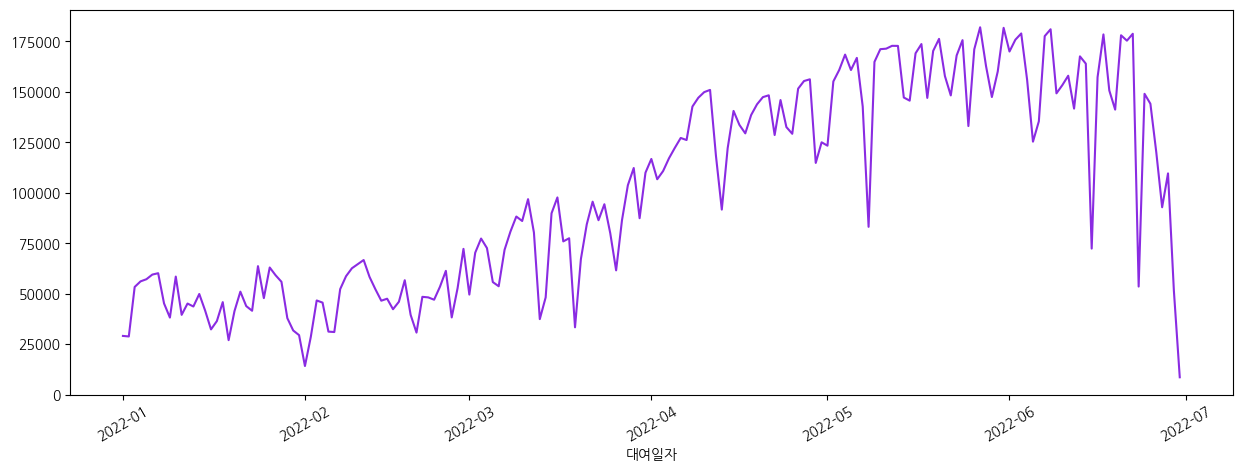

In [13]:
# 일자별 대여량 확인하기
df_rent.groupby('대여일자')['대여수'].mean().plot(rot=30, figsize=(15, 5) ,color='blueviolet')

<AxesSubplot:xlabel='대여연월', ylabel='대여수'>

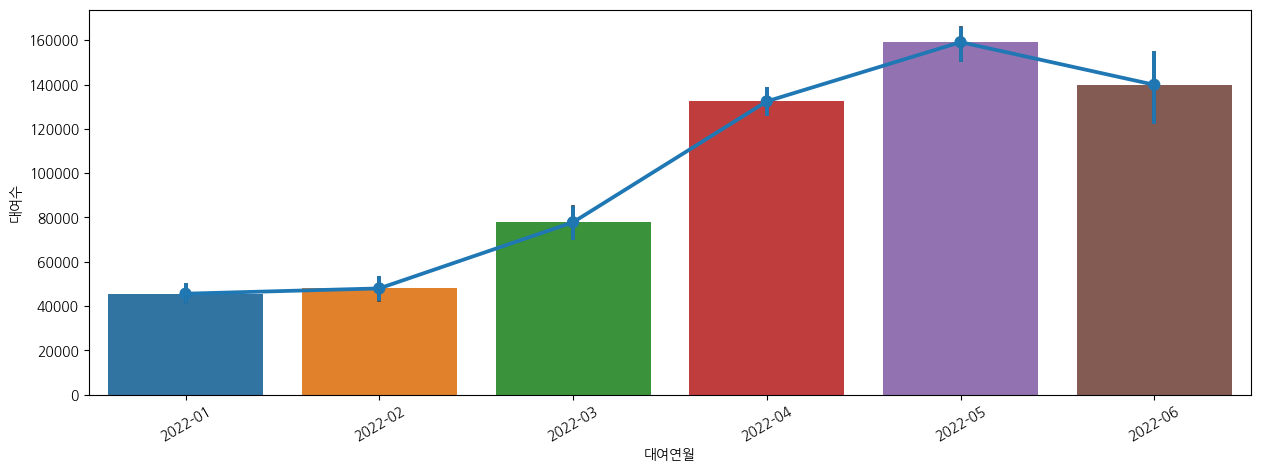

In [14]:
# 월별 대여량 확인하기
plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
sns.barplot(data=df_rent, x="대여연월", y="대여수")
sns.pointplot(data=df_rent, x="대여연월", y="대여수")

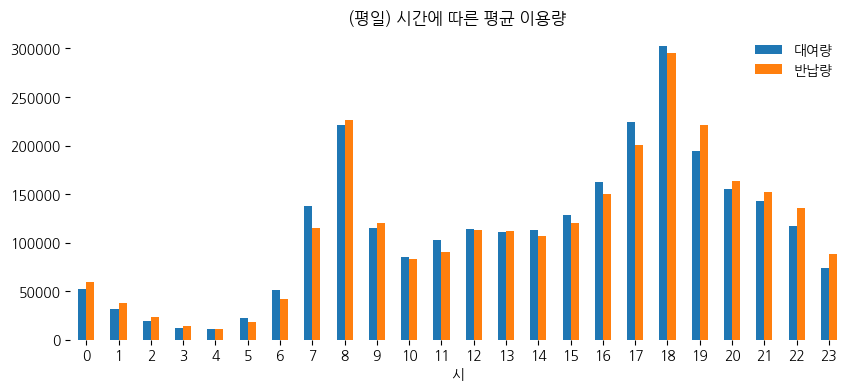

In [15]:
# 평일의 시간에 따른 사용량 살펴보기
ax = pd.DataFrame(
    data={
        "대여량": df_2022[df_2022['대여요일'] < 5].groupby('대여시간').size() // 5,
        "반납량": df_2022[df_2022['대여요일'] < 5].groupby('반납시간').size() // 5
    }
).plot.bar(
    rot=0,
    xlabel="시",
    title="(평일) 시간에 따른 평균 이용량",
    figsize=(10, 4)
)
ax.set_frame_on(False)
ax.legend(frameon=False)

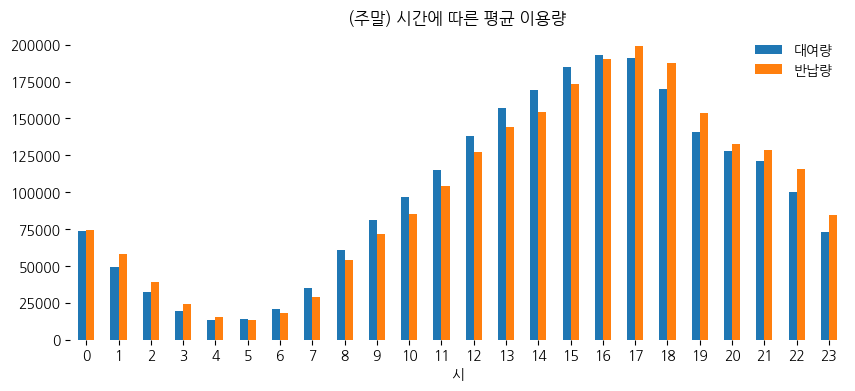

In [16]:
# 주말의 시간에 따른 사용량 살펴보기
ax = pd.DataFrame(
    data={
        "대여량": df_2022[df_2022['대여요일'] >= 5].groupby('대여시간').size() // 2,
        "반납량": df_2022[df_2022['대여요일'] >= 5].groupby('반납시간').size() // 2
    }
).plot.bar(
    rot=0,
    xlabel="시",
    title="(주말) 시간에 따른 평균 이용량",
    figsize=(10, 4)
)
ax.set_frame_on(False)
ax.legend(frameon=False);

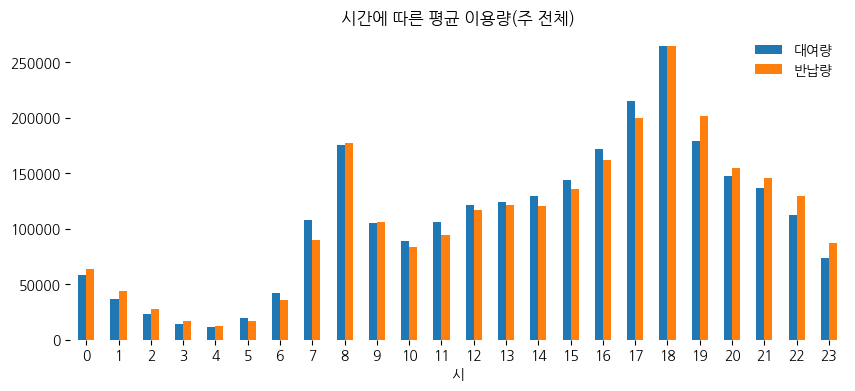

In [17]:
# 시간대별 이용량 살펴보기
ax = pd.DataFrame(
    data={
        "대여량": df_2022.groupby('대여시간').size() // 7,
        "반납량": df_2022.groupby('반납시간').size() // 7
    }
).plot.bar(
    rot=0,
    xlabel="시",
    title="시간에 따른 평균 이용량(주 전체)",
    figsize=(10, 4)
)
ax.set_frame_on(False)
ax.legend(frameon=False);

평일의 경우, 대여/반납 시간대가 모두 8시와 18시에 몰려있다. 주로 출퇴근 시간에 몰린듯 하다.

주말의 경우, 밤시간대로 갈수록 몰린다. 주로 18시 전후로 최고치를 찍는다.

한편, 출근시간 제외하고, 일반적으로 낮에는 대여량 > 반납량이고, 밤에는 그 반대다.

## 지역별 대여 반납 비율 파악하기

In [18]:
### 거치소 dataframe
rental_df=pd.read_csv('./rental_spot.csv',low_memory=False,encoding='cp949')
del rental_df['LCD']
del rental_df['QR']
# rental_df_gu: 대여한 대여소번호의 자치구
rental_df_gu=rental_df[['대여소번호','자치구']]
rental_df_gu.columns=['대여대여소','대여지역']
# return_df_gu: 반납한 반납소번호의 자치구
return_df_gu=rental_df[['대여소번호','자치구']]
return_df_gu.columns=['반납대여소','반납지역']

In [19]:
### 2022 dataframe과 대여소번호, 반납소번호를 key로 삼아 자치구만 추가해주기
df_2022=pd.merge(left = df_2022 , right = rental_df_gu, how = "inner", on = "대여대여소")
df_2022=pd.merge(left = df_2022 , right = return_df_gu, how = "inner", on = "반납대여소")
df_2022.isnull().sum()

대여일시       0
대여대여소      0
대여대여소이름    0
대여거치대      0
반납일시       0
반납대여소      0
반납대여소이름    0
반납거치대      0
이용시간       0
이용거리       0
대여연월       0
대여연도       0
대여월        0
대여일        0
대여시간       0
대여요일       0
대여일자       0
반납연월       0
반납연도       0
반납월        0
반납일        0
반납시간       0
반납요일       0
반납일자       0
대여지역       0
반납지역       0
dtype: int64

In [20]:
#대여지역구와 반납지역구가 다른 경우(유입 유출 파악 위해)
df_2022[df_2022['대여지역']!=df_2022['반납지역']]

,대여일시,대여대여소,대여대여소이름,대여거치대,반납일시,반납대여소,반납대여소이름,반납거치대,이용시간,이용거리,...,대여일자,반납연월,반납연도,반납월,반납일,반납시간,반납요일,반납일자,대여지역,반납지역
5450,2022-01-04 14:47:47,115,마스타 빌딩 앞,0,2022-01-04 14:54:58,102,망원역 1번출구 앞,0,7,0.0,...,2022-01-04,2022-01,2022,1,4,14,1,2022-01-04,서대문구,마포구
5451,2022-01-04 16:20:50,115,마스타 빌딩 앞,0,2022-01-04 16:32:49,102,망원역 1번출구 앞,0,11,1770.0,...,2022-01-04,2022-01,2022,1,4,16,1,2022-01-04,서대문구,마포구
5452,2022-01-05 15:46:57,115,마스타 빌딩 앞,0,2022-01-05 15:59:29,102,망원역 1번출구 앞,0,12,1730.0,...,2022-01-05,2022-01,2022,1,5,15,2,2022-01-05,서대문구,마포구
5453,2022-01-08 15:10:51,115,마스타 빌딩 앞,0,2022-01-08 15:22:50,102,망원역 1번출구 앞,0,11,1760.0,...,2022-01-08,2022-01,2022,1,8,15,5,2022-01-08,서대문구,마포구
5454,2022-01-15 08:49:41,115,마스타 빌딩 앞,99,2022-01-15 08:57:51,102,망원역 1번출구 앞,99,8,1920.0,...,2022-01-15,2022-01,2022,1,15,8,5,2022-01-15,서대문구,마포구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18121362,2022-03-23 09:29:50,4884,H비즈니스파크,0,2022-03-23 11:19:26,2532,국립국악원 앞,0,109,18710.0,...,2022-03-23,2022-03,2022,3,23,11,2,2022-03-23,송파구,서초구
18121374,2022-03-02 13:51:50,2377,수서역 5번출구 뒤,0,2022-03-02 15:18:04,4314,탑성마을 버스정거장 옆,0,86,8210.0,...,2022-03-02,2022-03,2022,3,2,15,2,2022-03-02,강남구,서초구
18121375,2022-03-02 13:51:49,2377,수서역 5번출구 뒤,0,2022-03-02 15:18:11,4314,탑성마을 버스정거장 옆,0,86,8250.0,...,2022-03-02,2022-03,2022,3,2,15,2,2022-03-02,강남구,서초구
18121376,2022-03-03 15:09:21,2377,수서역 5번출구 뒤,0,2022-03-03 16:39:46,4314,탑성마을 버스정거장 옆,0,90,8250.0,...,2022-03-03,2022-03,2022,3,3,16,3,2022-03-03,강남구,서초구


In [21]:
# 대여지역, 대여시간을 기준으로 대여량 확인
rental_by_time_region= df_2022[df_2022['대여요일'] < 5].groupby(['대여지역', '대여시간']).size() // 5
rental_by_time_region

대여지역  대여시간
강남구   0       1617
      1       1050
      2        723
      3        478
      4        329
              ... 
중랑구   19      5725
      20      4806
      21      4522
      22      3686
      23      2579
Length: 600, dtype: int64

In [22]:
# 대여시간대별이 column이 됨
rental_by_time_region_table = rental_by_time_region.unstack()
rental_by_time_region_table.head()

대여시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
대여지역,,,,,,,,,,,,,,,,,,,,,
강남구,1617,1050,723,478,329,555,1347,3165,5438,3476,...,3522,4079,5404,8174,10629,5941,4332,3857,3111,1976
강동구,2269,1319,848,529,462,1304,2885,6661,9025,4643,...,4674,5229,6820,8707,11220,8445,6795,6535,5156,3283
강북구,1140,807,581,418,335,427,783,1559,2506,1599,...,1749,2043,2428,2988,3946,2847,2469,2378,1948,1454
강서구,4136,2433,1473,909,950,2390,6749,19116,30931,13242,...,11570,13374,17135,24348,34357,21940,16700,15177,12028,7150
관악구,2236,1366,976,650,539,810,1429,3520,5519,3063,...,2908,3223,3877,5076,6967,5751,5073,4899,4340,3058


Text(158.75347222222223, 0.5, '')

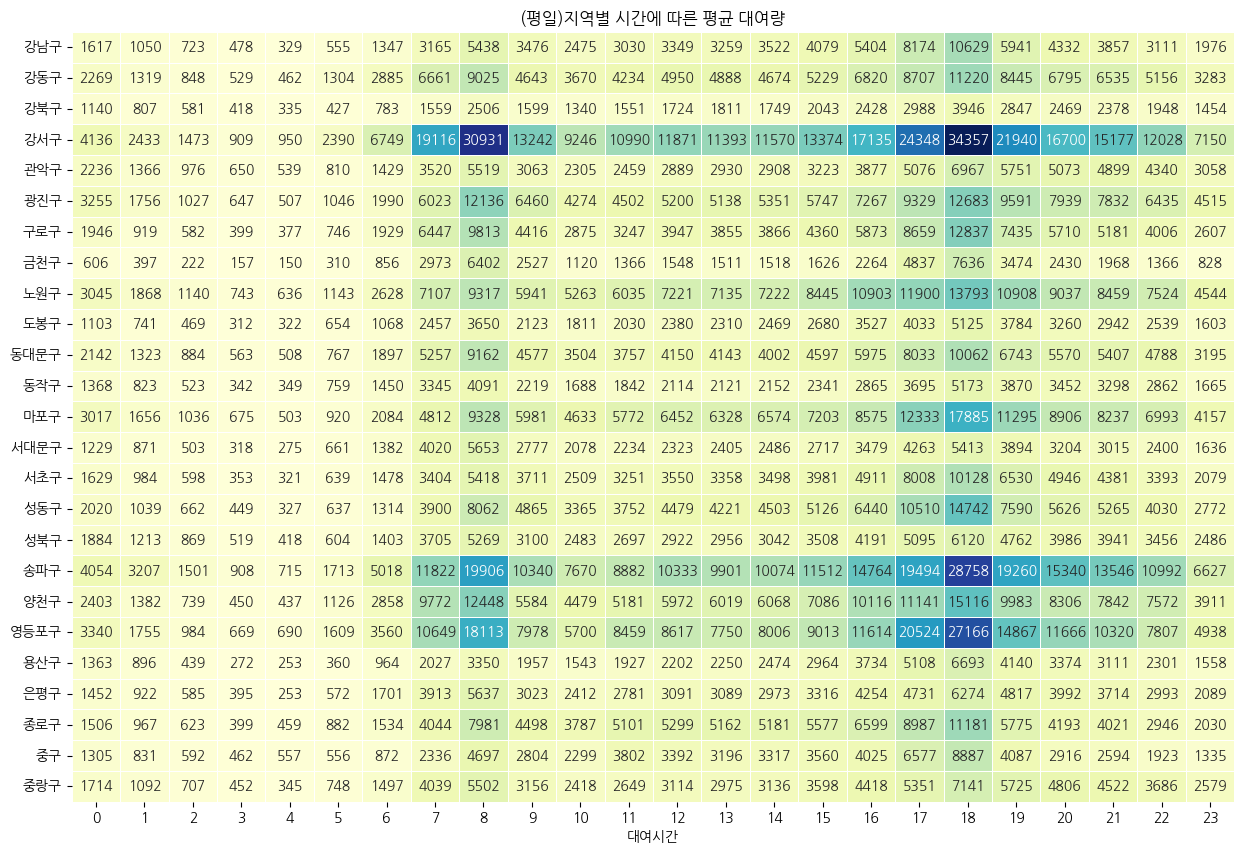

In [23]:
_, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(rental_by_time_region_table,
    annot=True,
    fmt='d',
    cmap="YlGnBu",
    cbar=False,
    linewidth=0.5,
    ax=ax
)
ax.set_title("(평일)지역별 시간에 따른 평균 대여량")
ax.set_ylabel("")

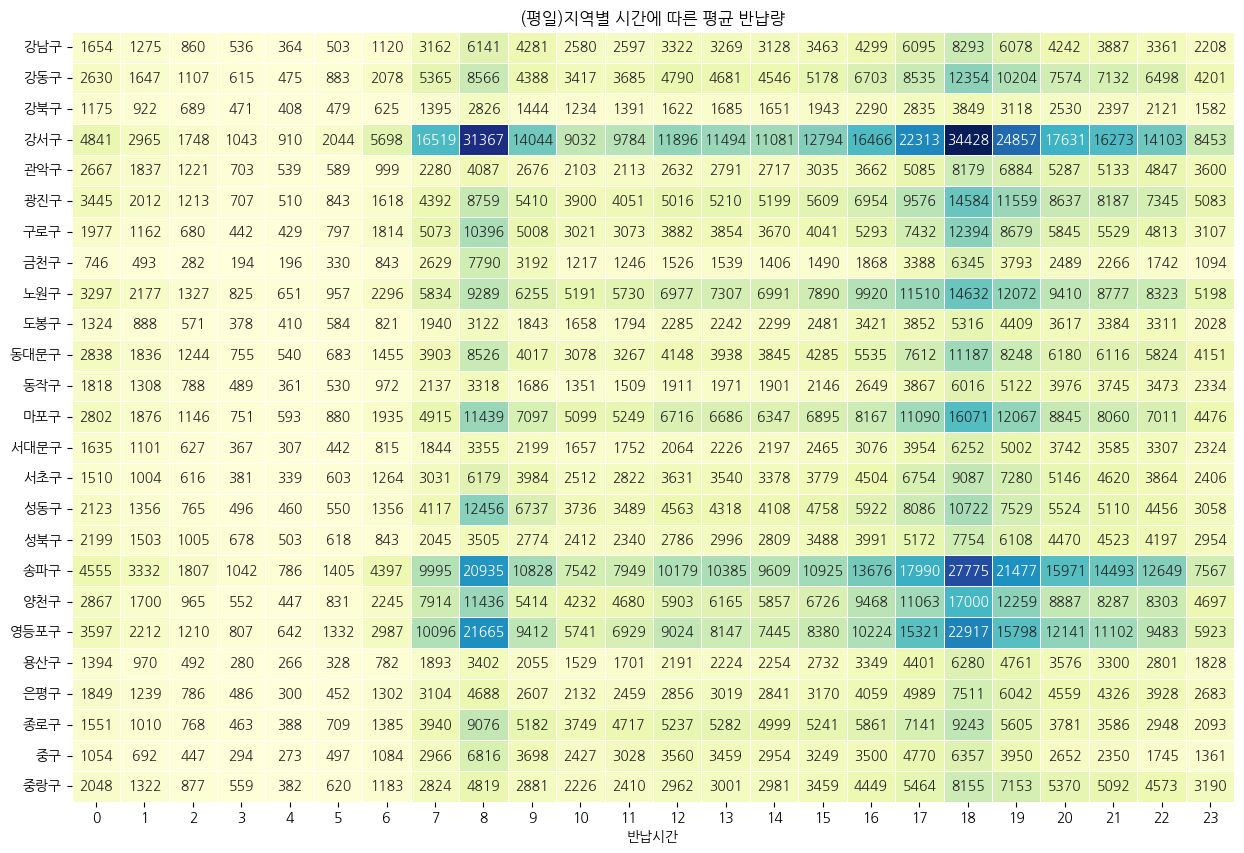

In [24]:
return_by_time_region=df_2022[df_2022['반납요일'] < 5].groupby(['반납지역', '반납시간']).size() // 5
return_by_time_region_table =return_by_time_region.unstack()

_, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(return_by_time_region_table,
    annot=True,
    fmt='d',
    cmap="YlGnBu",
    cbar=False,
    linewidth=0.5,
    ax=ax
)
ax.set_title("(평일)지역별 시간에 따른 평균 반냡량")
ax.set_ylabel("");

- 강서구, 송파구, 영등포구 공통적으로 대여, 반납 많음

- 출퇴근 시간에 공통적으로 색이 진하게 그려져 있음

- 그러면 출퇴근 시간에 대여량이 반납량보다 높은지역은?

- 반대로 반납량이 대여량보다 많은 지역은?

In [25]:
# 대여량 8시, 18시
rent_at_8and18 = pd.DataFrame(
    data=[rental_by_time_region.xs(8, level=1),rental_by_time_region.xs(18, level=1)], index=[8, 18]
)
rent_at_8and18

대여지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
8,5438,9025,2506,30931,5519,12136,9813,6402,9317,3650,...,8062,5269,19906,12448,18113,3350,5637,7981,4697,5502
18,10629,11220,3946,34357,6967,12683,12837,7636,13793,5125,...,14742,6120,28758,15116,27166,6693,6274,11181,8887,7141


In [26]:
# 반납량 8시, 18시
rtrn_at_8and18 = pd.DataFrame(
    data = [return_by_time_region.xs(8, level=1), return_by_time_region.xs(18, level=1)], index=[8, 18]
)
rtrn_at_8and18

반납지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
8,6141,8566,2826,31367,4087,8759,10396,7790,9289,3122,...,12456,3505,20935,11436,21665,3402,4688,9076,6816,4819
18,8293,12354,3849,34428,8179,14584,12394,6345,14632,5316,...,10722,7754,27775,17000,22917,6280,7511,9243,6357,8155


In [27]:
# 전체에서 대여 반납이 차지하는 비율 파악하기
total =rent_at_8and18 + rtrn_at_8and18
rent_at_8and18=rent_at_8and18 / total
rtrn_at_8and18=rtrn_at_8and18/total

In [28]:
# 출근시간 8시에서의 대여 반납량 차이
morning_diff = pd.DataFrame(
    data={'대여': rent_at_8and18.loc[8], '반납': rtrn_at_8and18.loc[8]}
).sort_values('대여')
# 퇴근시간 18시에서의 대여 반납량 차이
dinner_diff = pd.DataFrame(
    data={'대여': rent_at_8and18.loc[18], '반납': rtrn_at_8and18.loc[18]}
).sort_values('대여')

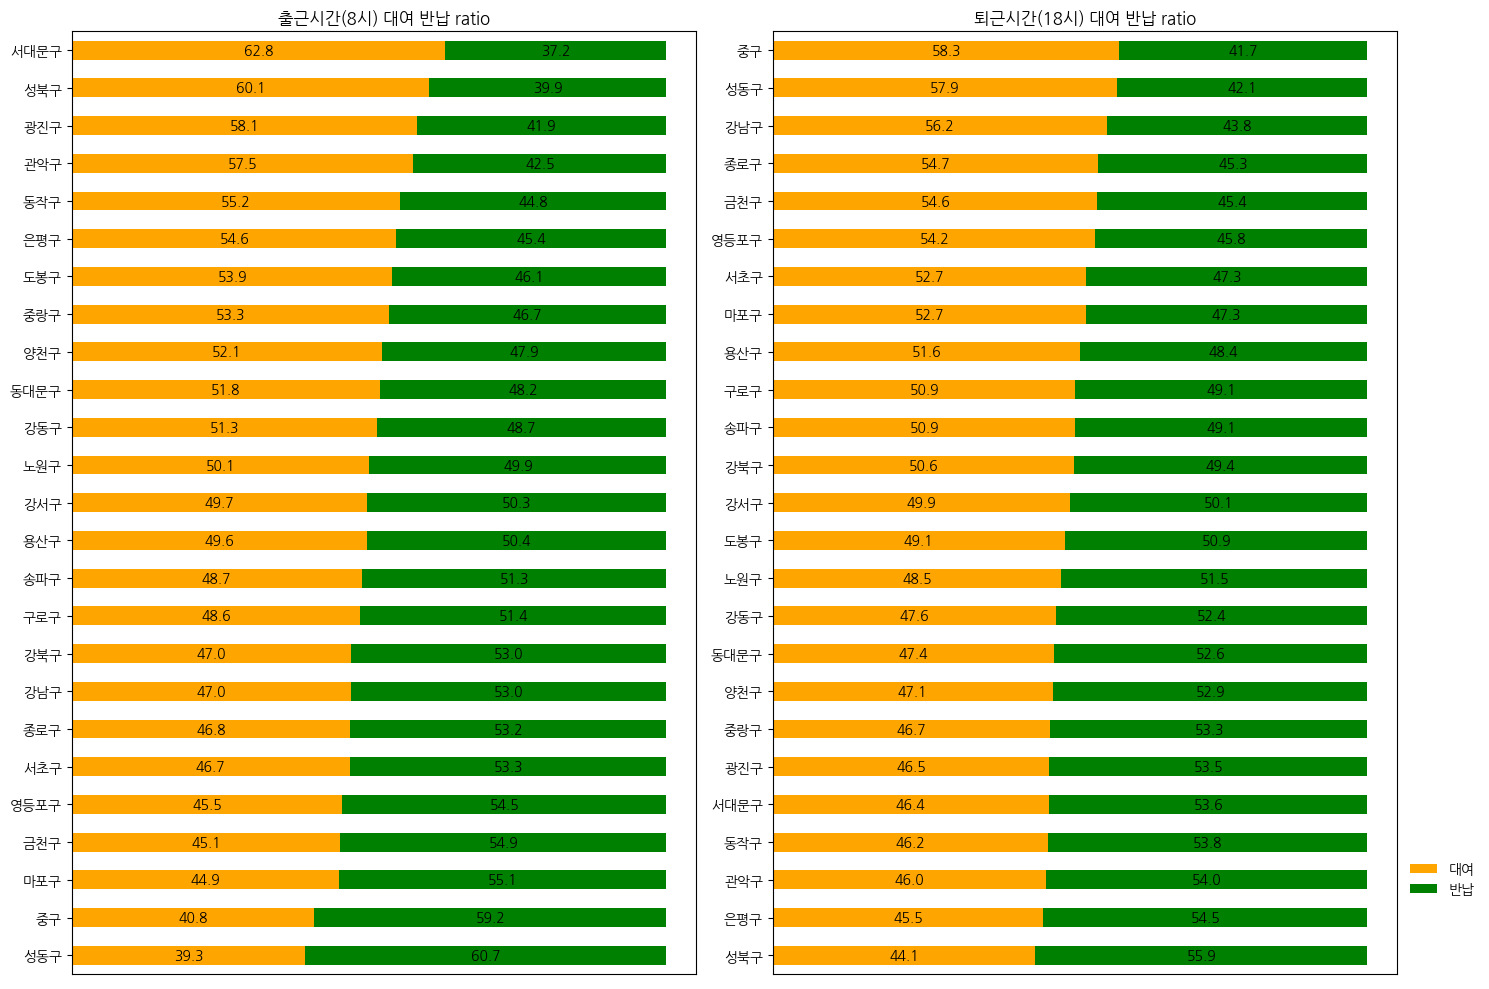

In [29]:
_, axes = plt.subplots(1, 2, figsize=(15, 10))

for i, (diff, time_name) in enumerate(zip([morning_diff, dinner_diff], ["출근시간(8시)", "퇴근시간(18시)"])):
    ax = diff.plot.barh(
        stacked=True,
        color=['orange', 'green'],
        title=f"{time_name} 대여 반납 ratio",
        ax=axes[i]
    )
    # patches는 막대기를 의미하는거
    for p in ax.patches: 
        x, y, width, height = p.get_bbox().bounds 
        ax.annotate("%.1f"%(width*100), (x+width/2, y+height/2), ha='center', va='center')
    ax.set_xticks([])

axes[0].get_legend().remove()
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.1), frameon=False)
_.tight_layout()

- 출근시간엔 서대문구가 대여가 25퍼 더 많음

- 중구, 성동구에서 아침에는 반납량이 많고 저녁에는 대여량이 많음


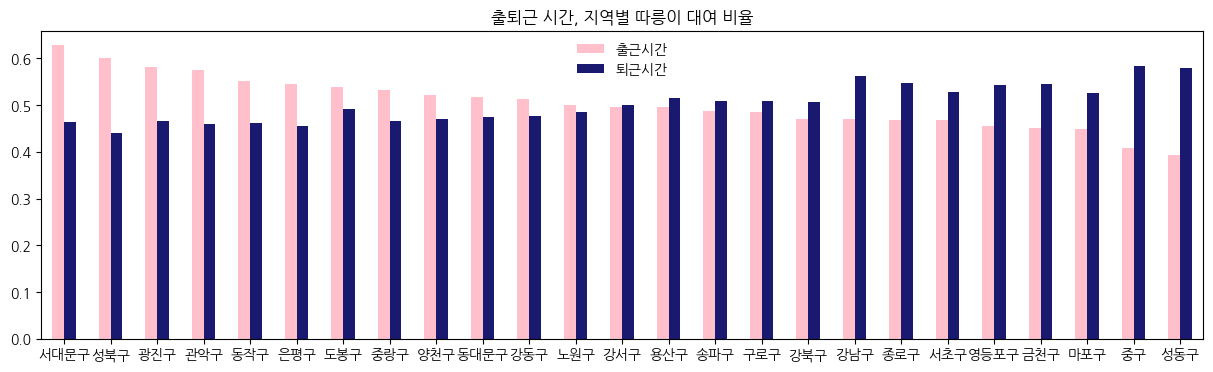

In [30]:
morning_dinner_diff = pd.DataFrame(
    data={'출근시간': morning_diff['대여'], '퇴근시간': dinner_diff['대여']}
).sort_values('출근시간', ascending=False)

ax = morning_dinner_diff.plot.bar(
    rot=0,
    color=['pink', 'midnightblue'],
    title="출퇴근 시간, 지역별 따릉이 대여 비율",
    figsize=(15, 4)
)
ax.legend(frameon=False);

- 출근시간 대여가 높은 지역(서대문구, 성북구,광진구 등)-> 거주지->근무지로 이동하는 것, 따라서 거주지역의 출근시간 대여량이 높음

- 퇴근시간 대여가 높은 지역(강남구, 종로구, 서초구, 영등포구, 금천구, 마포구, 중구, 성동구)-> 퇴근시간 대여량이 높음. 근무지->거주지로 이동

## 유출, 유입 많은 지역 살펴보기


In [63]:
# 지역 데이터 map 시각화를 위해 json데이터 불러오기
import json
from folium import plugins
lat=rental_df['위도'].mean()
long=rental_df['경도'].mean()

geo_path = './seoul_geo.json'
with open(geo_path,encoding='utf-8') as fp:
    geo_str = json.load(fp)

### 자치구별 유출, 유입 비율 확인하기

In [69]:
# 유출비율-> 한 지역에서 대여 후 타 지역에서 반납한 량/한 지역에서의 대여량
out_from_region = df_2022[['대여지역', '반납지역']].groupby('대여지역').apply(
    lambda x: (x['대여지역'] != x['반납지역']).sum() / len(x) * 100
).sort_values(ascending=False)
# 유입비율-> 타 지역에서 대여 후 한 지역에 반납한 량/ 한 지역에서의 반납량
in_to_region = df_2022[['대여지역', '반납지역']].groupby('반납지역').apply(
    lambda x: (x['대여지역'] != x['반납지역']).sum() / len(x) * 100
).sort_values(ascending=False)


In [70]:
#유출이 많을수록, 유입이 많은걸까?
inoutflow= pd.DataFrame(
    data={'유출비율': out_from_region, '유입비율': in_to_region}
).sort_values(by='유출비율', ascending=False)
inoutflow.head()

,유출비율,유입비율
중구,55.471180,52.976555
서대문구,50.316474,47.726057
동작구,47.023673,47.774885
성동구,43.111595,43.384966
성북구,42.732069,43.138240


In [68]:
inoutflow.corr()
# 유출비율과 유입비율은 거의 동일한 분포를 가진다. 즉 유출비율이 높은 지역은 유입비율도 높다. 상관계수 1에 수렴

,유출비율,유입비율
유출비율,1.00000,0.99389
유입비율,0.99389,1.00000


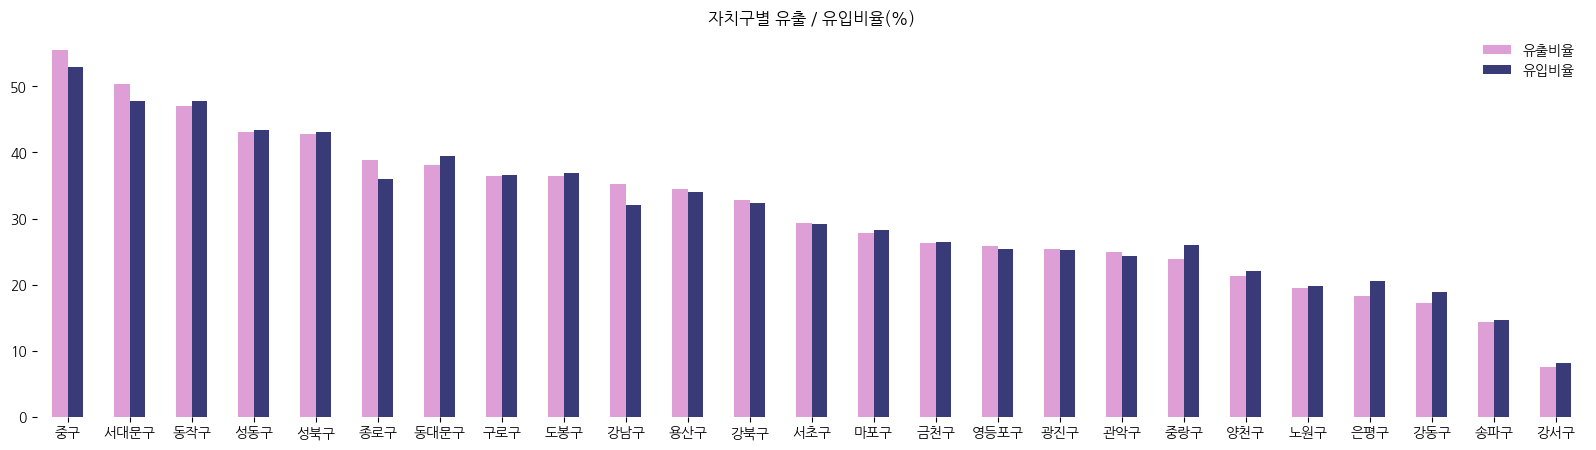

In [54]:
ax = inoutflow.plot(
    kind='bar',
    rot=0,
    colormap='tab20b_r',
    figsize=(20, 5)
)
ax.set_title("자치구별 유출 / 유입비율(%)")
ax.legend(frameon=False)
ax.set_frame_on(False)

In [66]:
# 왼쪽은 유출 비율 오른쪽은 유입 비율
inoutflow_by_district_map = folium.plugins.DualMap(
    location=[lat,long],
    zoom_start=10.8,
    tiles='CartoDB positron',
    zoom_control=False
)
folium.Choropleth(geo_str,
    data=out_from_region,
    key_on='feature.properties.SIG_KOR_NM', 
    fill_color='PuRd',
    line_color='grey',
    highlight=True
).add_to(inoutflow_by_district_map.m1)

folium.Choropleth(geo_str,
    data=in_to_region,
    key_on='feature.properties.SIG_KOR_NM', 
    fill_color='Purples',
    line_color='grey',
    highlight=True
).add_to(inoutflow_by_district_map.m2)

inoutflow_by_district_map.save('inoutflow_by_district_map.html')

### 시간대에 따른 자치구별 유출 유입 비율 확인하기

- 단순한 자치구별 유출 유입 비율이 아닌 시간대에 따른 비율을 확인하여보자

In [ ]:
# 주중 데이터로 파악하자
df_weekday = df_2022[df_2022['대여요일'] < 5]
# 주중 유출
out_from_region_weekday = df_weekday.groupby('대여지역').apply(
    lambda x: x[x['대여지역'] != x['반납지역']].groupby('대여시간').size() \
               / x.groupby('대여시간').size() * 100
)
out_from_region_weekday.head()

In [ ]:
# 주중 유입

in_to_region_weekday = df_weekday.groupby('반납지역').apply(
    lambda df: df[df['대여지역'] != df['반납지역']].groupby('반납시간').size() \
               / df.groupby('반납시간').size() * 100
)
in_to_region_weekday.head()

- 유입 비율에서 유출 비율을 뺀 값을 지표로 삼아 cluster map

/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


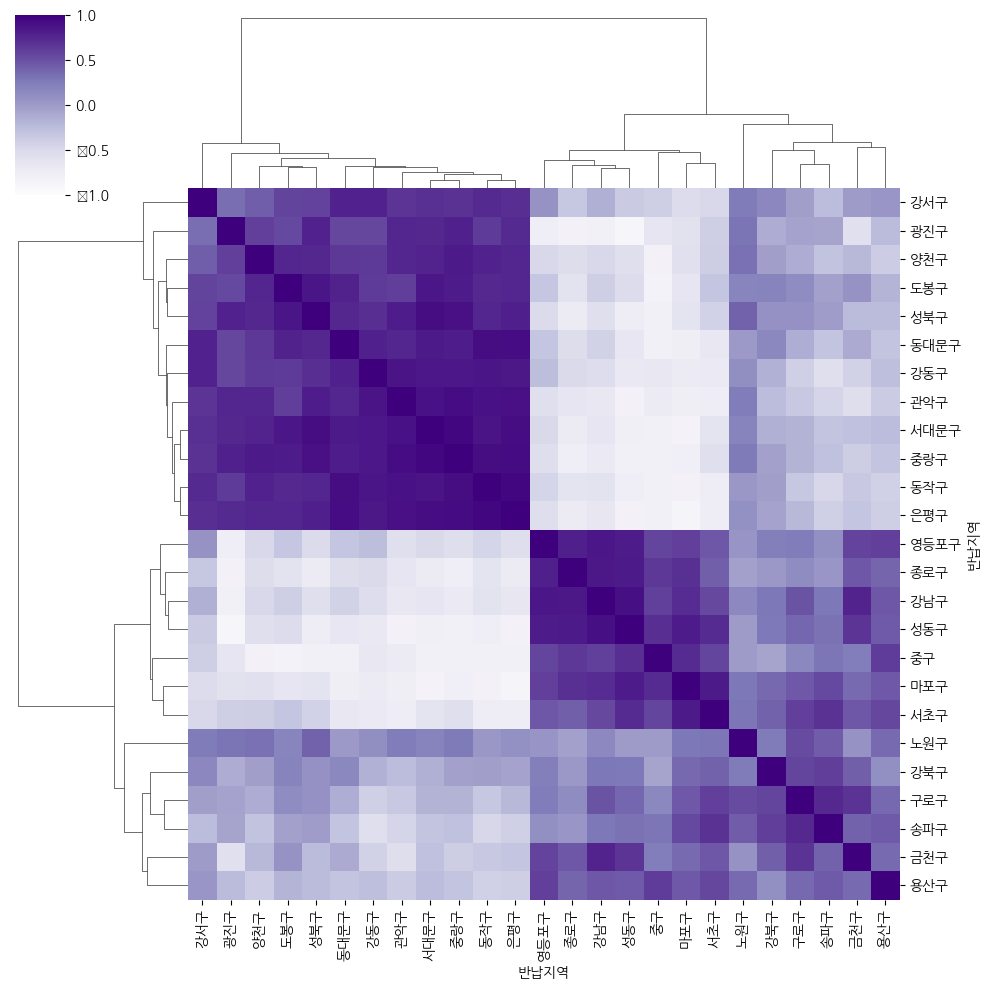

In [76]:
inout_ratio = in_to_region_weekday - out_from_region_weekday
clustergrid = sns.clustermap(inout_ratio.T.corr(),
    cmap='Purples',
    vmin=-1,
    vmax=1,
    cbar=True
)

In [81]:
reordered_ind = clustergrid.dendrogram_row.reordered_ind
inout_ratio.index[reordered_ind]

Index(['강서구', '광진구', '양천구', '도봉구', '성북구', '동대문구', '강동구', '관악구', '서대문구', '중랑구',
       '동작구', '은평구', '영등포구', '종로구', '강남구', '성동구', '중구', '마포구', '서초구', '노원구',
       '강북구', '구로구', '송파구', '금천구', '용산구'],
      dtype='object', name='반납지역')

In [82]:
inout_ratio = inout_ratio.reindex(inout_ratio.index[reordered_ind])
inout_ratio.head()

반납시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
반납지역,,,,,,,,,,,,,,,,,,,,,
강서구,1.710259,5.447159,2.903738,0.106904,-1.471141,0.449528,-4.639618,-3.051872,0.494890,0.440343,...,-0.983712,-0.312213,-0.348612,-1.479084,1.419846,5.219913,2.771578,2.249908,2.760576,3.552003
광진구,-5.696194,-1.349770,-2.268374,-3.621495,-3.142261,-0.522595,-5.910524,-15.534666,-22.234655,-14.899995,...,1.862815,1.172031,0.891332,5.507734,11.902917,10.137792,4.611047,1.707747,0.103607,-0.832476
양천구,3.332829,4.166751,4.339189,5.417053,12.970935,-8.951974,-5.299759,-9.611892,-6.938359,-3.391772,...,0.822684,0.188957,-1.023746,1.985421,8.979264,11.065789,3.069835,1.910076,-2.111554,0.943707
도봉구,4.569103,1.602919,1.610026,8.680575,12.437268,1.661977,-8.798267,-11.897277,-7.497114,-4.272111,...,-1.778570,-0.974833,0.801282,-0.712953,1.576711,8.819341,7.224374,5.896547,6.587012,3.162536
성북구,2.648646,4.110431,1.391269,7.894891,7.490984,3.784123,-18.708721,-28.085986,-19.342637,-4.681309,...,-1.829588,2.510357,0.538330,2.989609,11.865749,11.139934,7.528674,6.208514,4.390322,2.724318


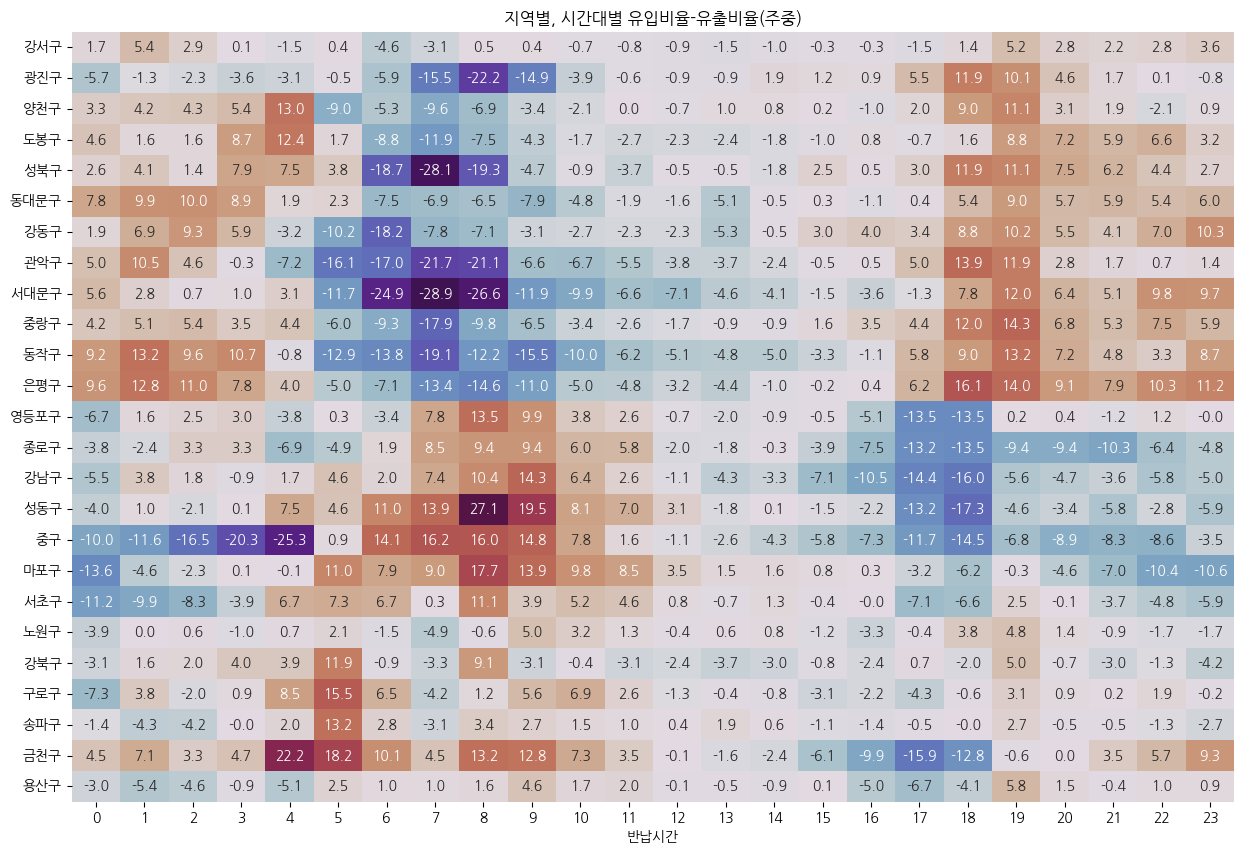

In [86]:
# 시간에 따른 각 지역별 (유입 - 유출비율) 히트맵
_, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(inout_ratio,
    vmin=-32,
    vmax=32,
    square=False,
    annot=True,
    fmt=".1f",
    cmap='twilight_shifted', 
    cbar=False,
    ax=ax
)
ax.set_title("지역별, 시간대별 유입비율-유출비율(주중)")
ax.set_ylabel("");

- Cluster A: 강서구~은평구-> 출근하는 사람들이 많은 주거지역

- Cluster B: 영등포구~용산구-> 출근시간에 유입이 많은 경제활동지역

### 유입/유출이 가장 활발한 지역은?
- 출근 시간대에 유입이 아주 높고 퇴근 시간에 유출이 심한 경우
- 위의 반대인 경우

In [90]:
inout_diff = (abs(inout_ratio.iloc[:, 7:10].mean(axis=1)) + abs(inout_ratio.iloc[:, 17:20].mean(axis=1))).sort_values(ascending=False)
inout_diff

반납지역
성동구     31.873904
서대문구    28.617496
광진구     26.739253
관악구     26.737209
중구      26.607377
성북구     26.035075
은평구     25.066658
동작구     24.933917
강남구     22.736643
중랑구     21.654481
종로구     21.148557
금천구     19.928505
영등포구    19.323075
마포구     16.820319
양천구     13.990832
강동구     13.516106
동대문구    12.046841
도봉구     11.116534
서초구      8.801712
용산구      4.070899
노원구      2.901523
강서구      2.425771
강북구      2.130020
송파구      1.703907
구로구      1.469122
dtype: float64

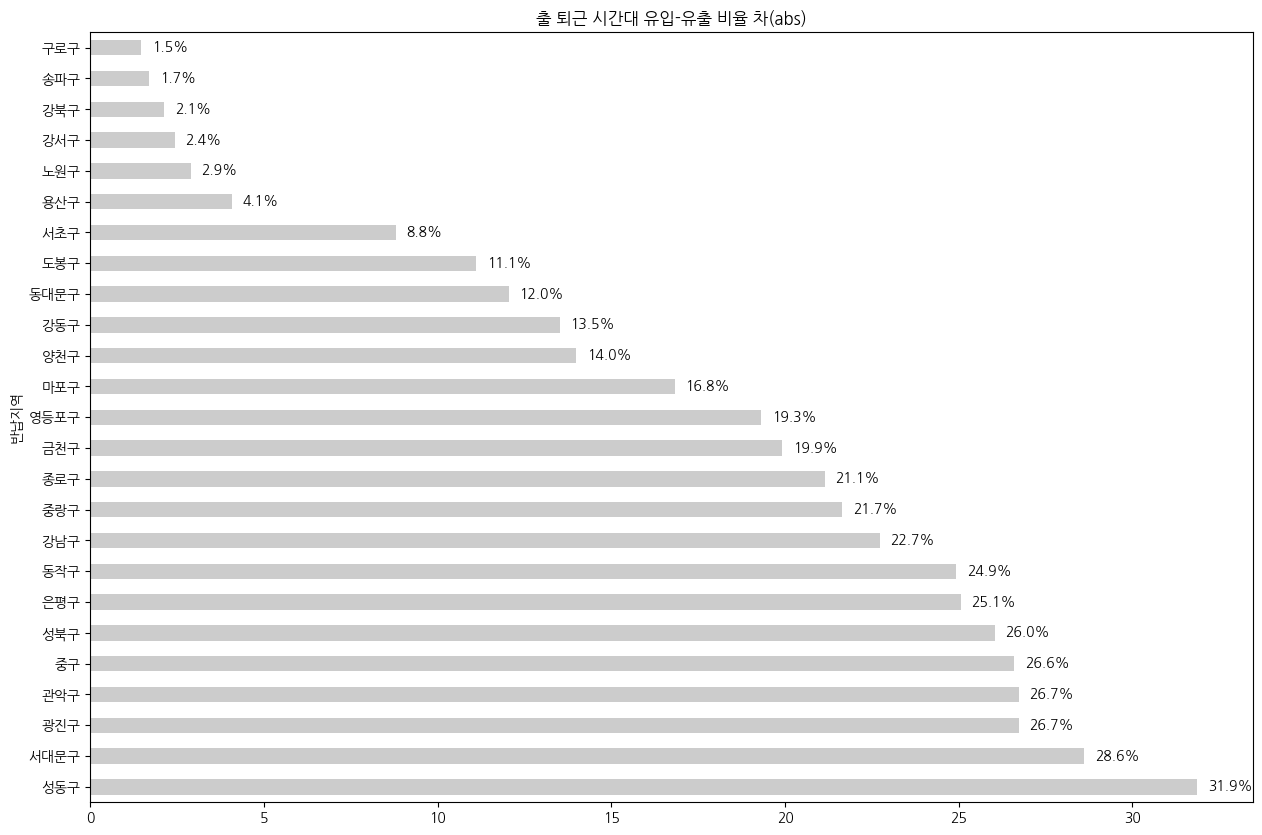

In [105]:
# 차이값이 큰 순으로 정렬
ax = inout_diff.plot(
    kind='barh',
    rot=0,
    colormap='nipy_spectral_r',
    title="출 퇴근 시간대 유입-유출 비율 차(abs)",
    figsize=(15, 10)
)
for p in ax.patches: 
    x, y, width, height = p.get_bbox().bounds
    ax.text(width+0.3, y+height/2, f"{width:.1f}%", va='center')

In [113]:
# 색이 진할수록 값이 크다.
inout_diff_map  = folium.Map(
    location=[lat,long],
    zoom_start=10,
    tiles='CartoDB positron',
    zoom_control=False
)
folium.Choropleth(geo_str,
    data=inout_diff,
    key_on='feature.properties.SIG_KOR_NM', 
    fill_color='YlGnBu',
    line_color='grey',
    highlight=True
).add_to(inout_diff_map)

inout_diff_map.save("inout_diff_map.html")

- 성동구, 서대문구 등이 출 퇴근 시간의 유입, 유출 간의 차이가 큼
- 성동구는 특히 출근 시간의 유입이 많아 자전거 거치소에 많은 자전거가 있을 것이라 추정됨

## 성동구 거치소 시간대별 파악 및 재분배
- 아침 시간 대에 평균적으로 적은 따릉이가 배치되는 거치소를 찾아 이곳에 거치하도록 유도하기  

In [ ]:
# near_df_207=rental_df.loc[(rental_df['자치구']=='영등포구') & (rental_df['위도']<37.54) & (rental_df['위도']>37.52)& (rental_df['경도']>126.92) & (rental_df['경도']<126.95)]
# near_df_207.shape
# 자치구가 성동구 안에 있는 대여소 찾기
seongdong_df=rental_df.loc[(rental_df['자치구']=='성동구')]
for row in seongdong_df.itertuples():
    print(row)

In [ ]:
from folium.plugins import MarkerCluster

myMap = folium.Map([lat, long], zoom_start = 10)
coords = []
for i in range(len(rental_df)-1):
    x = rental_df['위도'][i]
    y = rental_df['경도'][i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 100,
        color = 'RdYlGn',
        fill = 'crimson',
    ).add_to(myMap)
    
# folium.Marker([37.527157, 126.9319],
#   popup="여의나루역 1번출구 앞",
#   icon=folium.Icon(color='green', icon='fa-bicycle',prefix='fa')).add_to(myMap)

# folium.CircleMarker([37.527157, 126.9319],
#   radius=100,
#   color='blue',
#   fill_color='skyblue').add_to(myMap)

def plot(df):
    # 리스트를 이용해 여러 행의 데이터를 위,경도로 묶음
    locations = list(zip(df.위도, df.경도))
    # 반복문을 이용해 locations로 정의한 변수에 해당하는 위치에 자동차 모양의 빨간색 아이콘을 지정했다.
    icons = [folium.Icon(icon='fa-bicycle', prefix="fa", color="blue") for _ in range(len(locations))]

    # 역시 같은 원리로 아이콘을 클릭했을 때, 팝업이 생성되게 할 예정인데, 먼저 팝업 안에 들어갈 내용을 지정한다.
    popup_content = []
    for information in df.itertuples():
        content = "<b>대여소번호 : {}</b>  <br /> 대여소명: {}".format(information.대여소번호, information._2)
        popup_content.append(content)
    popups = [folium.Popup(content, min_width=300, max_width=300) for content in popup_content]
    cluster = MarkerCluster(locations = locations, icons = icons, popups = popups)
    # 지도에 클러스터를 추가.
    cluster.add_to(myMap)
    
plot(seongdong_df)
# myMap.save('index.html')
myMap

## 2018년 데이터 전처리 및 2018-2022 데이터(garbage code)

In [ ]:
# bike_path='data/'
# bike_list=os.listdir(bike_path)
# df=[]
# for file in bike_list:
#     file_path=os.path.join(bike_path,file)
#     file_name='bike_'+file_path.split('.')[0][-4:]
#     file_name=pd.read_csv(file_path,low_memory=False)
#     df.append(file_name)

# weather_path='weather/'
# weather_list=os.listdir(weather_path)
# weather_df=[]
# for file in weather_list:
#     file_path=os.path.join(weather_path,file)
#     file_name='weather_'+file_path.split('.')[0][-4:]
#     file_name=pd.read_excel(file_path)
#     weather_df.append(file_name)
# print(df[4]['대여대여소이름'].dtypes)
# df[4]['대여대여소이름']=df[4]['대여대여소이름'].astype('object')
# df[4]['대여대여소이름']=df[4]['대여대여소이름'].str.replace("'","")
# #2018
# df[4].head()
# df[4]['대여대여소이름']=df[4]['대여대여소이름'].str.strip()

In [ ]:
# df_return_group = df_2022.groupby(["반납대여소이름","반납대여소"])["반납일시"].count()
# df_return = pd.DataFrame(df_return_group).reset_index()
# df_return.columns = ["반납대여소이름","반납대여소", "반납수"]
# df_return
# 대여량이 많은 상위 대여소 
# for i in range(5):
#     print('반납량 많은 상위 대여소 top 10\n',df[i]['반납대여소이름'].value_counts().head(5))
# print('반납량 많은 상위 대여소 top 10\n',df_return.sort_values('반납수',ascending=False))